# t-SNE Visualization of Sodium Transporters and Membrane Proteins Embeddings for Dimensionality Reduction and Classification

In [ ]:
# t-SNE helps by reducing these embeddings into 2D or 3D representations, making it easier to interpret the structure and relationships in the data.
# By applying t-SNE, you can gain a visual understanding of how the different protein sequences (sodium transporters and membrane proteins) are distributed in the feature space.
# Clusters that form in the t-SNE plot can indicate groups of proteins with similar characteristics, allowing you to observe whether the two classes (sodium transporters and membrane proteins) are well-separated or overlapping.
#isualizing the data in 2D can help assess class separability.
# On the other hand, if the two classes overlap significantly, it may suggest that more advanced techniques or different features are needed to improve classification accuracy.
# t-SNE also makes it easier to identify any outliers or anomalous data points. 
# In essence, t-SNE provides both a visual diagnostic tool and a validation step for understanding the effectiveness of the embeddings in representing the underlying protein data.

In [1]:
import torch

# Check if CUDA is available
if torch.cuda.is_available():
    print("CUDA is available.")
else:
    print("CUDA is not available.")

CUDA is available.


In [2]:
import numpy as np
import tensorflow as tf
from transformers import T5EncoderModel, T5Tokenizer
import torch
import h5py
import time
import argparse
import os

Shape of embeddings: (4638, 1100, 1024)
Shape after averaging: (4638, 1024)
Shape after t-SNE: (4638, 2)


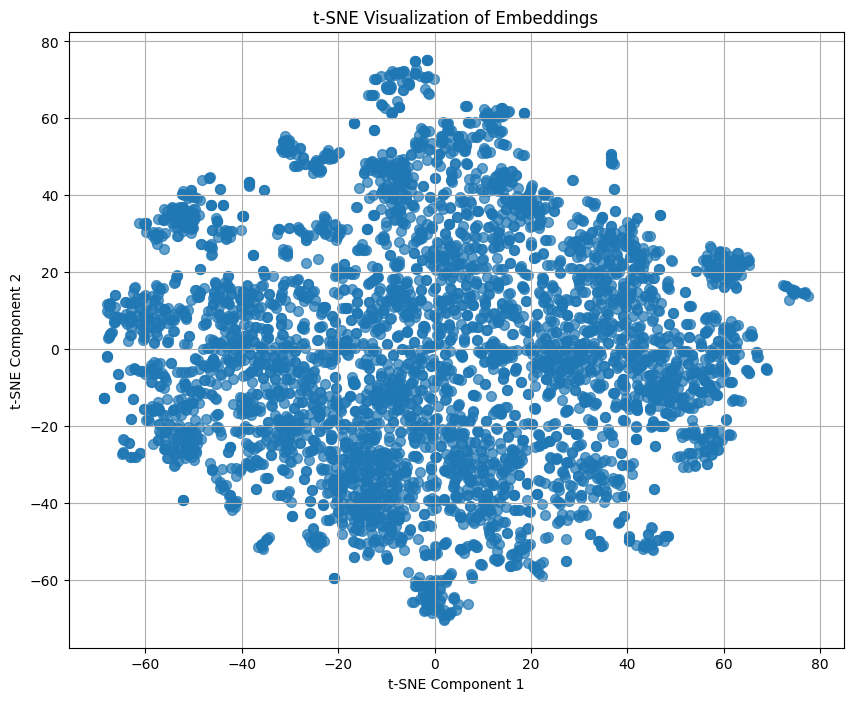

In [7]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load the saved embeddings from the .npy file
embeddings_array = np.load('C:/jupyter/Malik/SodiumTransporters/ProtTrans/All_Train_data.npy')

# Check the shape to confirm it's (4638, 1100, 1024)
print(f"Shape of embeddings: {embeddings_array.shape}")

# Average across the second dimension (1100) to get the final representation (4638, 1024)
embeddings_avg = np.mean(embeddings_array, axis=1)

# Check the shape after averaging (4638, 1024)
print(f"Shape after averaging: {embeddings_avg.shape}")

# Apply t-SNE to reduce dimensions from 1024 to 2
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
embeddings_2d = tsne.fit_transform(embeddings_avg)

# Check the shape of the transformed data to confirm it's (4638, 2)
print(f"Shape after t-SNE: {embeddings_2d.shape}")

# Plot the 2D t-SNE result
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], s=50, alpha=0.7)
plt.title('t-SNE Visualization of Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()


Shape of embeddings: (4638, 1100, 1024)
Shape of labels: (4638,)
Shape of embeddings after t-SNE: (4638, 2)


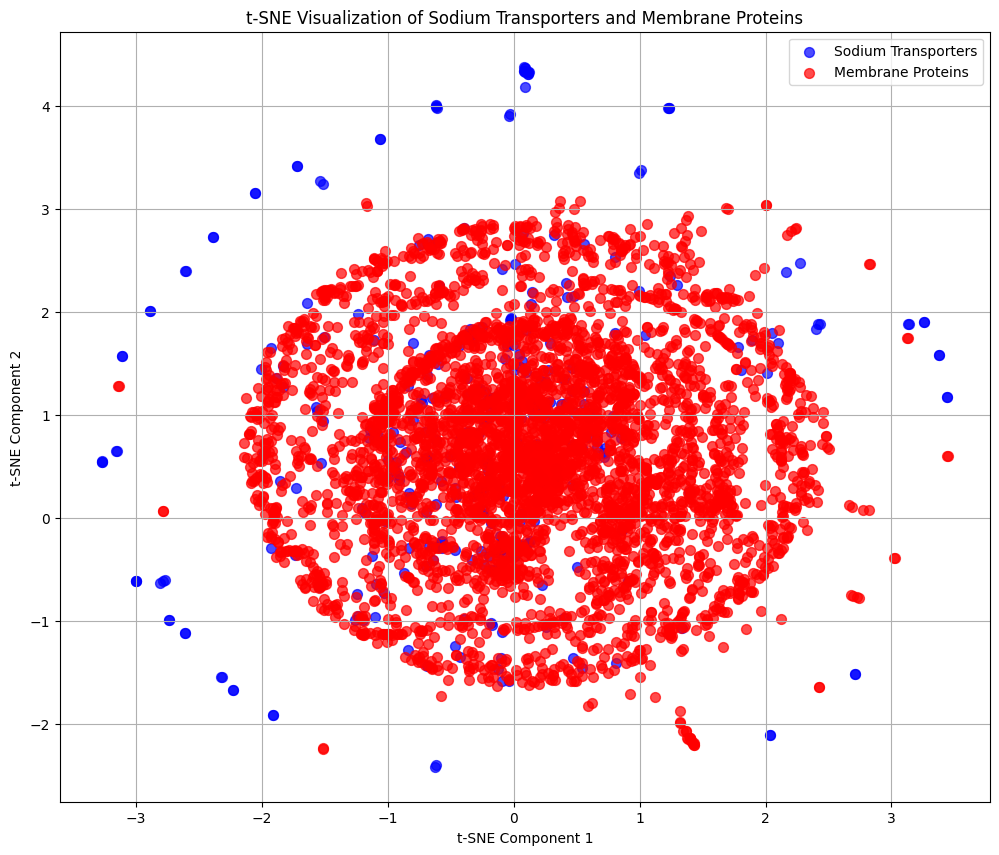

In [11]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def apply_tsne(embeddings_array, perplexity=40, n_iter=10000):
    """
    Applies t-SNE to reduce dimensionality of embeddings to 2D.

    Args:
    - embeddings_array: The NumPy array with shape (n_samples, n_features).
    - perplexity: The perplexity parameter for t-SNE.
    - n_iter: The number of iterations for optimization.

    Returns:
    - A NumPy array with shape (n_samples, 2) representing the 2D t-SNE embedding.
    """
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity, n_iter=n_iter)
    embeddings_2d = tsne.fit_transform(embeddings_array)
    return embeddings_2d

def plot_combined_tsne(embeddings_tsne, labels):
    """
    Plots the 2D t-SNE embeddings from both classes on the same plot.

    Args:
    - embeddings_tsne: The NumPy array with shape (n_samples, 2) for t-SNE embeddings.
    - labels: The binary labels (0 for membrane proteins, 1 for sodium transporters).
    """
    # Separate the embeddings based on labels (0 for membrane proteins, 1 for sodium transporters)
    positive_class = embeddings_tsne[labels == 1]  # Sodium transporters (label = 1)
    negative_class = embeddings_tsne[labels == 0]  # Membrane proteins (label = 0)
    
    # Plot the embeddings for both classes
    plt.figure(figsize=(12, 10))
    
    # Plot positive (sodium transporters) class
    plt.scatter(positive_class[:, 0], positive_class[:, 1], color='blue', label='Sodium Transporters', alpha=0.7, s=50)
    
    # Plot negative (membrane proteins) class
    plt.scatter(negative_class[:, 0], negative_class[:, 1], color='red', label='Membrane Proteins', alpha=0.7, s=50)
    
    plt.title('t-SNE Visualization of Sodium Transporters and Membrane Proteins')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()

# File paths (update these paths based on where your files are stored)
data_path = "C:/jupyter/Malik/SodiumTransporters/ProtTrans/"
embeddings_file = 'All_Train_data.npy'  # Embedding data file
labels_file = 'All_Train_labels.npy'  # One-hot encoded labels file

# Load the embeddings and labels
embeddings_array = np.load(data_path + embeddings_file)  # Shape: (4638, 1100, 1024)
labels_array = np.load(data_path + labels_file)  # Shape: (4638,)

# Check the shapes
print(f"Shape of embeddings: {embeddings_array.shape}")
print(f"Shape of labels: {labels_array.shape}")

# Reshape embeddings to be 2D (Flatten the sequences)
# Assuming the embeddings for each sample are 1100 x 1024, we need to flatten them to a 2D array
embeddings_reshaped = embeddings_array.reshape(embeddings_array.shape[0], -1)  # Shape: (4638, 1100 * 1024)

# Apply t-SNE to reduce to 2D
embeddings_tsne = apply_tsne(embeddings_reshaped)

# Check the shape after t-SNE
print(f"Shape of embeddings after t-SNE: {embeddings_tsne.shape}")

# Plot the combined t-SNE results
plot_combined_tsne(embeddings_tsne, labels_array)

Shape of all embeddings: (5799, 1100, 1024)
Shape of all labels: (5799,)
Shape of embeddings after t-SNE: (5799, 2)
Figure saved at: C:/jupyter/Malik/SodiumTransporters/Code/tsne_plot.png


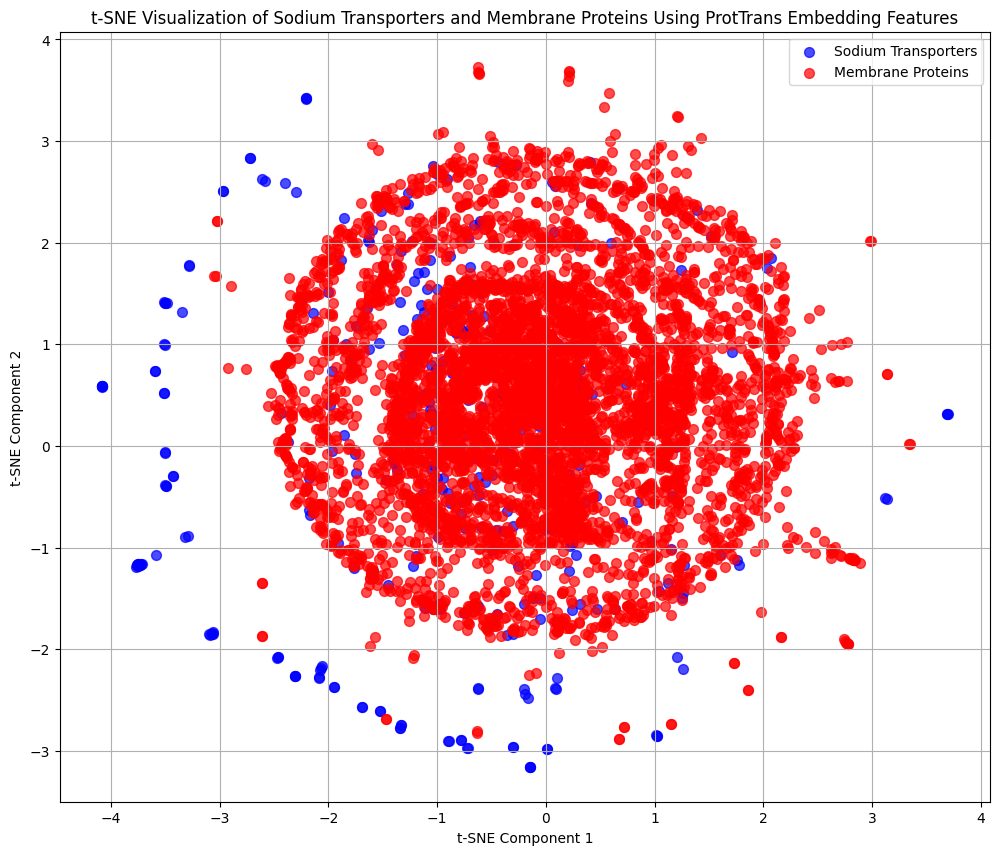

In [5]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def apply_tsne(embeddings_array, perplexity=40, n_iter=10000):
    """
    Applies t-SNE to reduce dimensionality of embeddings to 2D.

    Args:
    - embeddings_array: The NumPy array with shape (n_samples, n_features).
    - perplexity: The perplexity parameter for t-SNE.
    - n_iter: The number of iterations for optimization.

    Returns:
    - A NumPy array with shape (n_samples, 2) representing the 2D t-SNE embedding.
    """
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity, n_iter=n_iter)
    embeddings_2d = tsne.fit_transform(embeddings_array)
    return embeddings_2d

def plot_combined_tsne(embeddings_tsne, labels, save_path=None):
    """
    Plots the 2D t-SNE embeddings from both classes on the same plot.

    Args:
    - embeddings_tsne: The NumPy array with shape (n_samples, 2) for t-SNE embeddings.
    - labels: The binary labels (0 for membrane proteins, 1 for sodium transporters).
    - save_path: Optional; the file path to save the plot.
    """
    # Separate the embeddings based on labels (0 for membrane proteins, 1 for sodium transporters)
    positive_class = embeddings_tsne[labels == 1]  # Sodium transporters (label = 1)
    negative_class = embeddings_tsne[labels == 0]  # Membrane proteins (label = 0)
    
    # Plot the embeddings for both classes
    plt.figure(figsize=(12, 10))
    
    # Plot positive (sodium transporters) class
    plt.scatter(positive_class[:, 0], positive_class[:, 1], color='blue', label='Sodium Transporters', alpha=0.7, s=50)
    
    # Plot negative (membrane proteins) class
    plt.scatter(negative_class[:, 0], negative_class[:, 1], color='red', label='Membrane Proteins', alpha=0.7, s=50)
    
    plt.title('t-SNE Visualization of Sodium Transporters and Membrane Proteins Using ProtTrans Embedding Features')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.legend()
    plt.grid(True)
    
    # Save the plot if save_path is provided
    if save_path is not None:
        plt.savefig(save_path, format='png', dpi=300, bbox_inches='tight')
        print(f"Figure saved at: {save_path}")
    
    # Show the plot
    plt.show()

# File paths
data_path = "C:/jupyter/Malik/SodiumTransporters/ProtTrans/"
train_embeddings_file = 'All_Train_data.npy'
train_labels_file = 'All_Train_labels.npy'
test_embeddings_file = 'All_Test_data.npy'
test_labels_file = 'All_Test_labels.npy'
# Define the save path for the figure
figure_save_path = "C:/jupyter/Malik/SodiumTransporters/Code/tsne_plot.png"
# Load train and test embeddings and labels
train_embeddings = np.load(data_path + train_embeddings_file)  # Shape: (train_samples, 1100, 1024)
train_labels = np.load(data_path + train_labels_file)  # Shape: (train_samples,)
test_embeddings = np.load(data_path + test_embeddings_file)  # Shape: (test_samples, 1100, 1024)
test_labels = np.load(data_path + test_labels_file)  # Shape: (test_samples,)

# Concatenate train and test data
all_embeddings = np.concatenate((train_embeddings, test_embeddings), axis=0)  # Shape: (total_samples, 1100, 1024)
all_labels = np.concatenate((train_labels, test_labels), axis=0)  # Shape: (total_samples,)

# Check shapes
print(f"Shape of all embeddings: {all_embeddings.shape}")
print(f"Shape of all labels: {all_labels.shape}")

# Reshape embeddings to be 2D (Flatten the sequences)
all_embeddings_reshaped = all_embeddings.reshape(all_embeddings.shape[0], -1)  # Shape: (total_samples, 1100 * 1024)

# Apply t-SNE to reduce to 2D
all_embeddings_tsne = apply_tsne(all_embeddings_reshaped)

# Check the shape after t-SNE
print(f"Shape of embeddings after t-SNE: {all_embeddings_tsne.shape}")

# Plot the combined t-SNE results
plot_combined_tsne(all_embeddings_tsne, all_labels, save_path=figure_save_path)